<a href="https://colab.research.google.com/github/DHANYA-P-31/Kmeans/blob/main/Kmeans2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

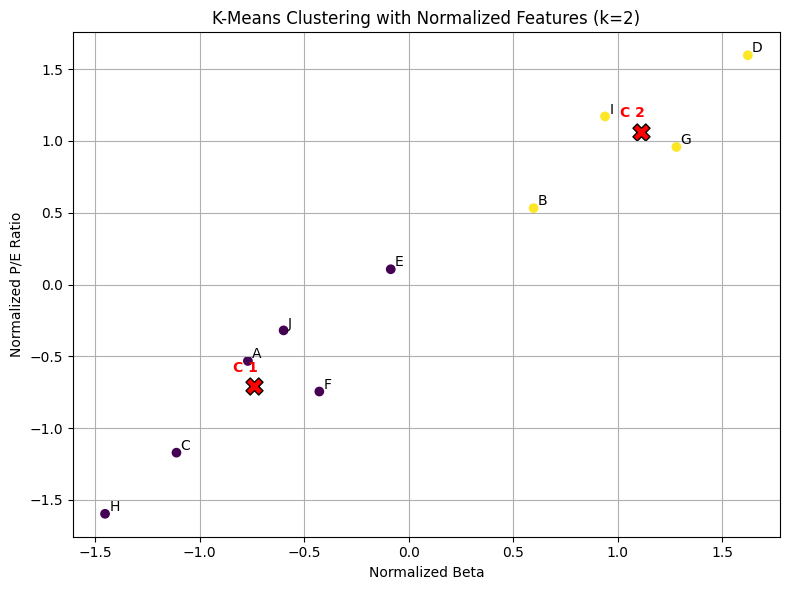

Intra-cluster variance (per feature):
Cluster 1: Beta Var = 0.2384, P/E Var = 0.3704, P/E / Beta = 1.55
Cluster 2: Beta Var = 0.1946, P/E Var = 0.1965, P/E / Beta = 1.01

Average Silhouette Score per Cluster:
Cluster 1: Avg Silhouette Score = 0.5882
Cluster 2: Avg Silhouette Score = 0.6627

Eigenvalues of Covariance Matrix per Cluster:
Cluster 1: Eigenvalues = [0.4896 0.0177]
Cluster 2: Eigenvalues = [0.2741 0.0193]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples

# Stock data
stocks = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J']
data = np.array([
    [0.8, 15.0],  # A
    [1.2, 20.0],  # B
    [0.7, 12.0],  # C
    [1.5, 25.0],  # D
    [1.0, 18.0],  # E
    [0.9, 14.0],  # F
    [1.4, 22.0],  # G
    [0.6, 10.0],  # H
    [1.3, 23.0],  # I
    [0.85, 16.0]  # J
])

# Normalize the features
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Custom initial centroids for k=2 (using first two points as an example)
custom_init = np.array([
    normalized_data[0],  # A
    normalized_data[3]   # D
])

# Apply KMeans with k=2
kmeans = KMeans(n_clusters=2, init=custom_init, n_init=1)
kmeans.fit(normalized_data)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(8, 6))
scatter = plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=labels, cmap='viridis')

# Annotate each point with its stock label
for i, stock in enumerate(stocks):
    plt.text(normalized_data[i, 0] + 0.02, normalized_data[i, 1] + 0.02, stock)

# Plot centroids and mark clusters as 1, 2
for i, (x, y) in enumerate(centroids):
    plt.scatter(x, y, c='red', marker='X', s=150, edgecolors='black')
    plt.text(x - 0.1, y + 0.1, f'C {i + 1}', fontsize=10, fontweight='bold', color='red')

# Axis labels and title
plt.xlabel('Normalized Beta')
plt.ylabel('Normalized P/E Ratio')
plt.title('K-Means Clustering with Normalized Features (k=2)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Group the normalized data by cluster
clusters_normalized = {}
for i in range(2):
    clusters_normalized[i] = normalized_data[labels == i]

# Calculate variance for each feature in each normalized cluster
print("Intra-cluster variance (per feature):")
for i in range(2):
    cluster_data = clusters_normalized[i]
    beta_var = np.var(cluster_data[:, 0], ddof=1)
    pe_var = np.var(cluster_data[:, 1], ddof=1)
    ratio = pe_var / beta_var if beta_var != 0 else float('inf')
    print(f"Cluster {i + 1}: Beta Var = {beta_var:.4f}, P/E Var = {pe_var:.4f}, P/E / Beta = {ratio:.2f}")

# Calculate individual silhouette scores for all points
sample_silhouette_values = silhouette_samples(normalized_data, labels)

# Compute the average silhouette score per cluster
print("\nAverage Silhouette Score per Cluster:")
for i in range(2):
    cluster_silhouette_vals = sample_silhouette_values[labels == i]
    avg_score = cluster_silhouette_vals.mean()
    print(f"Cluster {i + 1}: Avg Silhouette Score = {avg_score:.4f}")

# Calculate eigenvalues of covariance matrix per cluster
print("\nEigenvalues of Covariance Matrix per Cluster:")
for i in range(2):
    cluster_data = clusters_normalized[i]

    # Compute the covariance matrix (population covariance, bias=True)
    cov_matrix = np.cov(cluster_data.T, bias=True)

    # Compute eigenvalues
    eigenvalues = np.linalg.eigvals(cov_matrix)

    # Sort for better readability
    eigenvalues = np.sort(eigenvalues)[::-1]

    print(f"Cluster {i + 1}: Eigenvalues = {eigenvalues.round(4)}")